### Алгоритмы уменьшения размерности 

#### Повторить эксперименты в главе 5.1 Qalitative Comparison of Multiple Algorithms статьи UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction (https://arxiv.org/pdf/1802.03426.pdf)

#### Необходимо воспроизвести все графики данной главы, соотнести выводы из статьи с вашими результатами.

In [1]:
# !pip install umap-learn
# !pip install dataget
# !pip install matplotlib --upgrade

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

from umap import UMAP
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from dataget.image import fashion_mnist
from gensim.downloader import load

In [2]:
umap = UMAP()
tsne = TSNE(n_jobs=-1)
pca = PCA(n_components=2)

In [3]:
models = [("UMAP", umap), ("t-SNE", tsne), ("PCA", pca)]
datasets_names = ["COIL20", "MNIST", "Fashion MNIST", "Word Vectors"]

'Time on COIL20 using UMAP: 11 seconds'

'Time on COIL20 using t-SNE: 7 seconds'

'Time on COIL20 using PCA: 0 seconds'

'Time on MNIST using UMAP: 64 seconds'

'Time on MNIST using t-SNE: 951 seconds'

'Time on MNIST using PCA: 2 seconds'

'Time on Fashion MNIST using UMAP: 12 seconds'

'Time on Fashion MNIST using t-SNE: 84 seconds'

'Time on Fashion MNIST using PCA: 0 seconds'

'Time on Word Vectors using UMAP: 150 seconds'

'Time on Word Vectors using t-SNE: 3545 seconds'

'Time on Word Vectors using PCA: 2 seconds'

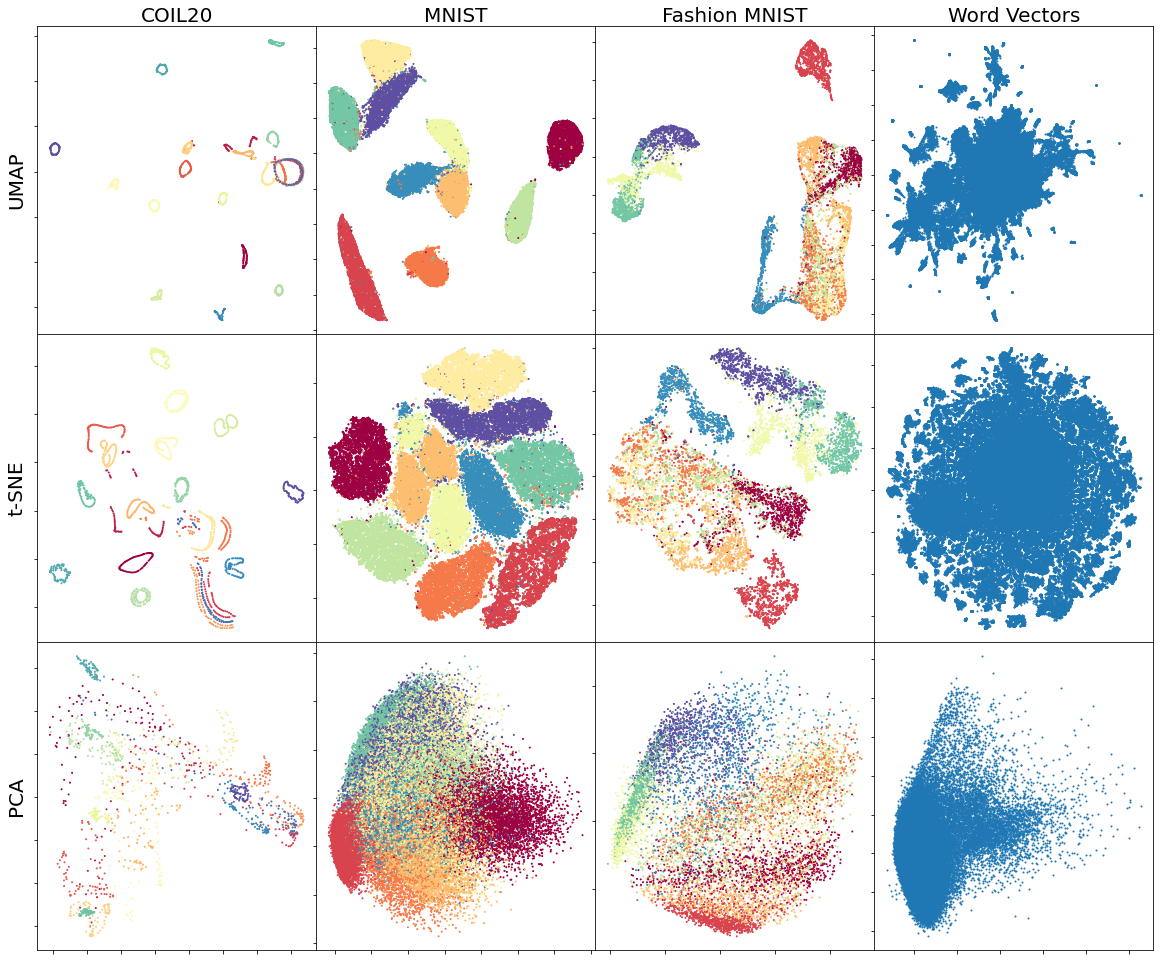

In [4]:
rows = len(models)
cols = len(datasets_names)
fig = plt.figure(figsize=(20, 17))
gs = fig.add_gridspec(rows, cols, hspace=0, wspace=0)
axs = gs.subplots()
for j in range(cols):
    axs[0, j].set_xlabel(datasets_names[j], fontsize=20)   
    axs[0, j].xaxis.set_label_position('top') 

for i in range(rows):
    axs[i, 0].set_ylabel(models[i][0], fontsize=20)   
    
for j in range(cols):
    data = x = y = None
    if j == 0:
        data = pd.read_csv('https://raw.githubusercontent.com/vaksakalli/datasets/master/coil20.csv')
        x = data.drop("1025", axis=1)
        y = data["1025"]
    elif j == 1:
        data = pd.read_csv("https://www.openml.org/data/get_csv/52667/mnist_784.csv")
        # data = data[:10000] # (70000, 785) -> (10000, 785)
        x = data.drop("class", axis=1)
        y = data["class"]
    elif j == 2:
        x, y = fashion_mnist().get()[2:4]
        x = x.reshape(-1, 28*28)
    elif j == 3:
        x = load('word2vec-google-news-300').vectors
        x = x[:200000] # (3000000, 300) -> (200000, 300)
        y = None
    
    for i in range(rows):
        start = time.time()
        embedding = models[i][1].fit_transform(x)
        axs[i, j].scatter(embedding[:, 0], embedding[:, 1], c=y, cmap='Spectral', s=1)
        axs[i, j].set_yticklabels([])
        axs[i, j].set_xticklabels([])
        end = time.time()
        display(f"Time on {datasets_names[j]} using {models[i][0]}: {int(end - start)} seconds")